In [7]:
print("Welcome to Handwritten Character Recognition Model")


Welcome to Handwritten Character Recognition Model


In [8]:
pip install numpy pandas matplotlib opencv-python scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

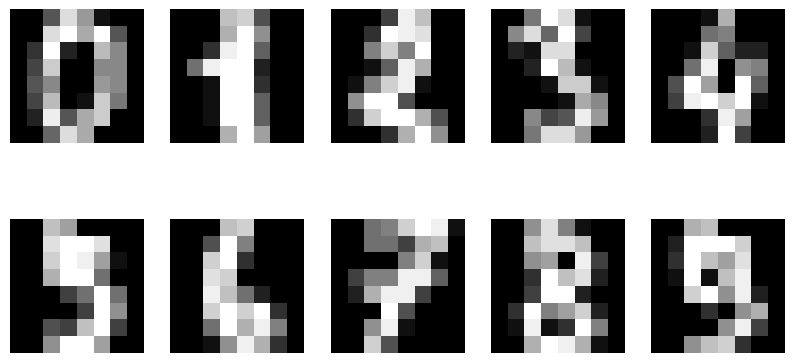

In [10]:
# Load dataset (handwritten digits from 0-9)
digits = datasets.load_digits()

# Display some sample images
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='gray')
    ax.axis('off')
plt.show()

In [11]:
# Flatten images (8x8 to 1D array)
X = digits.images.reshape((len(digits.images), -1))  
y = digits.target  # Labels (0-9)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
# Train an SVM model
model = SVC(kernel='linear')
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Check accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 97.50%


Predicted Label: 1


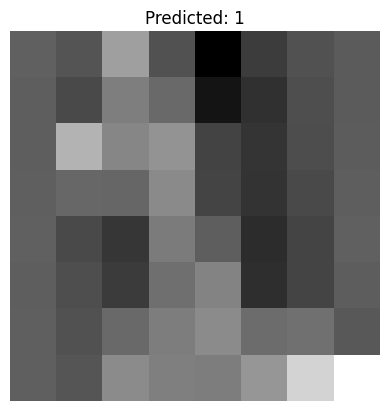

In [13]:
# Pick a random test image
sample_index = 5  # Change this number to test different images
sample_image = X_test[sample_index].reshape(1, -1)  # Reshape for model input

# Predict the digit
predicted_label = model.predict(sample_image)
print(f"Predicted Label: {predicted_label[0]}")

# Display the image
plt.imshow(X_test[sample_index].reshape(8, 8), cmap='gray')
plt.title(f"Predicted: {predicted_label[0]}")
plt.axis('off')
plt.show()